In [1]:
events = ['red', 'green', 'blue']

p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

In [3]:
from matplotlib import pyplot


In [4]:
print('p=%.3f Q=%.3f' % (sum(p), sum(q)))

p=1.000 Q=1.000


<BarContainer object of 3 artists>

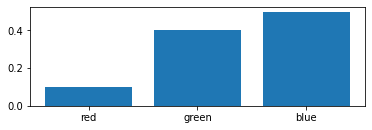

In [5]:
pyplot.subplot(2, 1, 1)
pyplot.bar(events, p)

<BarContainer object of 3 artists>

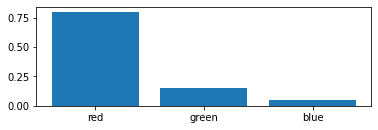

In [6]:
pyplot.subplot(2, 1, 2)
pyplot.bar(events, q)

In [7]:
pyplot.show()

In [26]:
from math import log2, log
def cross_entropy(p,q):
    return -sum([p[i]*log2(q[i]) for i in range(len(p))])

In [11]:
ce_pq = cross_entropy(p,q)
ce_qp = cross_entropy(q,p)

In [12]:
print(ce_pq, ce_qp)

3.2879430945989 2.9058316901429944


In [13]:
def kl_divergence(p,q):
    return sum(p[i]*log2(p[i]/q[i]) for i in range(len(p)))

In [14]:
def entropy(p):
    return -sum([p[i]*log2(p[i]) for i in range(len(p))])

In [15]:
def cross_entropy_kl(p, q):
    return entropy(p)+kl_divergence(p, q)

In [16]:
en_p = entropy(p)
en_p

1.360964047443681

In [17]:
kl_pq = kl_divergence(p, q)
kl_pq

1.9269790471552186

In [19]:
ce_pq = cross_entropy_kl(p, q)
ce_pq

3.2879430945988997

In [34]:
from numpy import asarray, mean

p = asarray([1,0,0])+1e-15
print(entropy(p))

9.805612959471341e-14


In [21]:
p

array([1.e+00, 1.e-15, 1.e-15])

In [22]:
asarray([0,1,0])+1e-15

array([1.e-15, 1.e+00, 1.e-15])

In [39]:
p = [1,1,1,1,1,0,0,0,0,0]
q = [0.8,0.9,0.9,0.6,0.8,0.1,0.4,0.2,0.1,0.3]

In [29]:
def cross_entropy(p,q):
    return -sum([p[i]*log(q[i]) for i in range(len(p))])

In [32]:
results = list()
for i in range(len(p)):
    expected = [1.0-p[i], p[i]]
    predicted = [1.0-q[i], q[i]]
    print(expected, predicted)
    ce = cross_entropy(expected, predicted)
    results.append(ce)

[0.0, 1] [0.19999999999999996, 0.8]
[0.0, 1] [0.09999999999999998, 0.9]
[0.0, 1] [0.09999999999999998, 0.9]
[0.0, 1] [0.4, 0.6]
[0.0, 1] [0.19999999999999996, 0.8]
[1.0, 0] [0.9, 0.1]
[1.0, 0] [0.6, 0.4]
[1.0, 0] [0.8, 0.2]
[1.0, 0] [0.9, 0.1]
[1.0, 0] [0.7, 0.3]


In [35]:
results, mean(results)

([0.2231435513142097,
  0.10536051565782628,
  0.10536051565782628,
  0.5108256237659907,
  0.2231435513142097,
  0.10536051565782628,
  0.5108256237659907,
  0.2231435513142097,
  0.10536051565782628,
  0.35667494393873245],
 0.24691989080446483)

In [36]:
from numpy import asarray
from keras import backend
from keras.losses import binary_crossentropy

In [40]:
p = asarray(p)
q = asarray(q)

In [41]:
y_true = backend.variable(p)
y_pred = backend.variable(q)

mean_ce = backend.eval(binary_crossentropy(y_true, y_pred))

In [42]:
mean_ce

0.24691972